### EDA 

In [259]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib as plt
import matplotlib.gridspec as gridspec
from matplotlib import pyplot as plt
from scipy import stats

### Import Data

In [260]:
house = pd.read_csv('Model Train.csv').drop('Unnamed: 0', axis=1)
house = house.set_index('Id')

In [261]:
house.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
134,20,RL,NaN,6853,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,220000
291,60,RL,120.0,15611,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,7,2006,New,Partial,233230
25,20,RL,NaN,8246,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,5,2010,WD,Normal,154000
1094,20,RL,71.0,9230,Pave,NaN,Reg,Lvl,AllPub,Corner,...,0,NaN,MnPrv,NaN,0,10,2006,WD,Normal,146000
1289,120,RL,40.0,5664,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,10,2009,WD,Normal,278000


In [262]:
house.shape

(1168, 80)

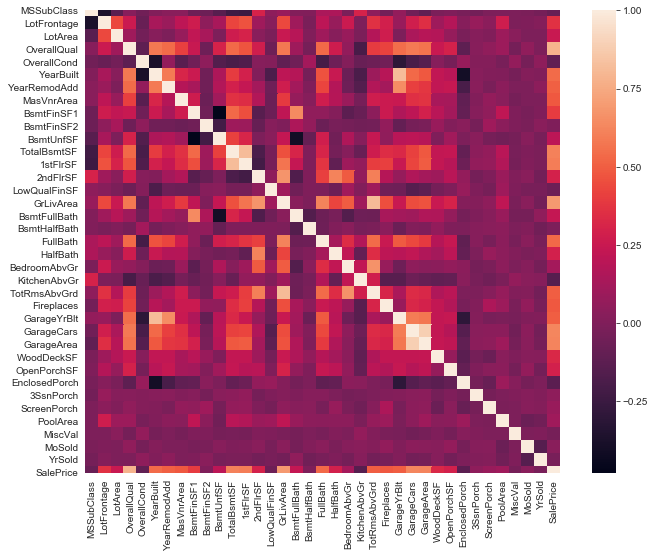

In [263]:
fig, ax = plt.subplots(figsize=(11.5,8.5))
sns.set_style("white")
sns.heatmap(house.corr(),square=True)

In [264]:
columns = ['RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual',
           'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure','BsmtFinType1', 
           'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'SalePrice']

In [265]:
df = house[columns].copy()

In [266]:
df.head()

,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,SalePrice
Id,,,,,,,,,,,,,,,,,,,
134,Gable,CompShg,VinylSd,VinylSd,BrkFace,136.0,Gd,TA,PConc,Ex,TA,No,GLQ,1005,Unf,0,262,1267,220000
291,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,Av,Unf,0,Unf,0,1079,1079,233230
25,Gable,CompShg,Plywood,Plywood,None,0.0,TA,Gd,CBlock,TA,TA,Mn,Rec,188,ALQ,668,204,1060,154000
1094,Hip,CompShg,MetalSd,MetalSd,BrkFace,166.0,TA,TA,CBlock,TA,TA,Mn,GLQ,661,Unf,0,203,864,146000
1289,Gable,CompShg,CemntBd,CmentBd,None,0.0,Gd,TA,PConc,Gd,TA,No,GLQ,1158,Unf,0,343,1501,278000


In [267]:
df.shape

(1168, 19)

### Transform Sales Price

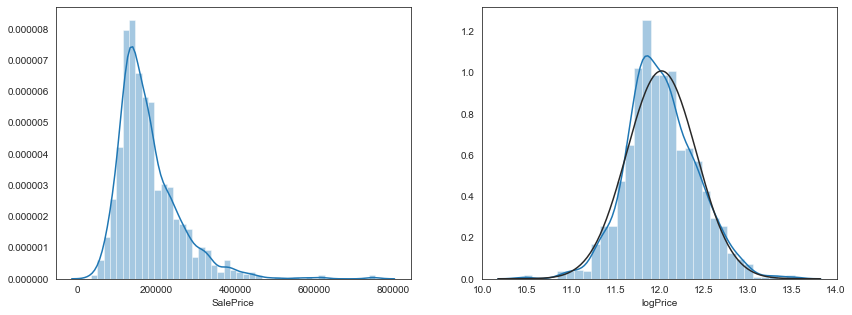

In [268]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(14, 5))

# histagram
# identify right skew
sns.distplot(df['SalePrice'], ax=ax1)

# normalize salesprice by log transformation
from scipy.stats import norm
df['logPrice'] = np.log(df['SalePrice'])

# transformed histogram
sns.distplot(df['logPrice'], fit=norm, ax=ax2)

In [269]:
df['SalePrice'].describe()

count      1168.000000
mean     180622.219178
std       79253.668338
min       34900.000000
25%      129375.000000
50%      161250.000000
75%      215000.000000
max      755000.000000
Name: SalePrice, dtype: float64

### Handling Missing Data

In [270]:
#check how many data missing in each columns
df_missing = df.isna().sum()
df_missing

RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       6
MasVnrArea       6
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual        31
BsmtCond        31
BsmtExposure    32
BsmtFinType1    31
BsmtFinSF1       0
BsmtFinType2    32
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
SalePrice        0
logPrice         0
dtype: int64

In [271]:
# no significant missing data, thus no drop any columns yet
df_missing/len(df)

RoofStyle       0.000000
RoofMatl        0.000000
Exterior1st     0.000000
Exterior2nd     0.000000
MasVnrType      0.005137
MasVnrArea      0.005137
ExterQual       0.000000
ExterCond       0.000000
Foundation      0.000000
BsmtQual        0.026541
BsmtCond        0.026541
BsmtExposure    0.027397
BsmtFinType1    0.026541
BsmtFinSF1      0.000000
BsmtFinType2    0.027397
BsmtFinSF2      0.000000
BsmtUnfSF       0.000000
TotalBsmtSF     0.000000
SalePrice       0.000000
logPrice        0.000000
dtype: float64

In [272]:

df[df.MasVnrType.isna()][["MasVnrType","MasVnrArea"]]

,MasVnrType,MasVnrArea
Id,,
530,NaN,NaN
1279,NaN,NaN
1244,NaN,NaN
974,NaN,NaN
937,NaN,NaN
235,NaN,NaN


In [273]:
# Basement
df[df.BsmtQual.isna()][["BsmtFinSF1","BsmtExposure","BsmtFinType2","BsmtQual","BsmtCond","BsmtFinType1"]]

,BsmtFinSF1,BsmtExposure,BsmtFinType2,BsmtQual,BsmtCond,BsmtFinType1
Id,,,,,,
1049,0,NaN,NaN,NaN,NaN,NaN
647,0,NaN,NaN,NaN,NaN,NaN
343,0,NaN,NaN,NaN,NaN,NaN
521,0,NaN,NaN,NaN,NaN,NaN
157,0,NaN,NaN,NaN,NaN,NaN
554,0,NaN,NaN,NaN,NaN,NaN
1012,0,NaN,NaN,NaN,NaN,NaN
91,0,NaN,NaN,NaN,NaN,NaN
1217,0,NaN,NaN,NaN,NaN,NaN


In [274]:
# Missing Data Imputation 

# Bsmt variables mostly have the same missingness
# Bsmt data missing because some houses don't have basement 
# Thus, replace NAs by ranking score 0 
# Since all those variables can be transformed to Numerical Ranking

df['BsmtQual'].fillna(0, inplace=True)
df['BsmtCond'].fillna(0, inplace=True)
df['BsmtExposure'].fillna(0, inplace=True)
df['BsmtFinType1'].fillna(0, inplace=True)
df['BsmtFinType2'].fillna(0, inplace=True)

In [275]:
# check missingness of Masonry Veneer
# MasVnrArea and MasVnrType have the same missingness
df[df.isna().any(axis=1)]

,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,SalePrice,logPrice
Id,,,,,,,,,,,,,,,,,,,,
530,Hip,CompShg,Wd Sdng,Stone,NaN,NaN,Gd,TA,PConc,TA,TA,No,Rec,1219,Unf,0,816,2035,200624,12.209188
1279,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,GLQ,804,Unf,0,324,1128,237000,12.375815
1244,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Ex,TA,PConc,Ex,Gd,Gd,GLQ,1386,Unf,0,690,2076,465000,13.049793
974,Gable,CompShg,CemntBd,CmentBd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,Unf,0,Unf,0,1428,1428,182000,12.111762
937,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,GLQ,833,Unf,0,343,1176,184900,12.127570
235,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,GLQ,625,Unf,0,235,860,216500,12.285346


In [276]:
df['BsmtFinType2'].value_counts()

Unf    1004
Rec      42
LwQ      34
0        32
BLQ      26
ALQ      17
GLQ      13
Name: BsmtFinType2, dtype: int64

In [277]:
df['BsmtFinType1'].value_counts()

GLQ    343
Unf    337
ALQ    173
BLQ    123
Rec    103
LwQ     58
0       31
Name: BsmtFinType1, dtype: int64

#### drop these 'MasVnrArea' and 'MasVnrType' because there are too many "None" and 0, means many house do not have Masonry veneer

In [278]:
# majority of the home do not have Masonry veneer area
df['MasVnrType'].value_counts()

None       690
BrkFace    354
Stone      106
BrkCmn      12
Name: MasVnrType, dtype: int64

In [279]:
# thus, fill missing values with 0 and "None"
df['MasVnrArea'].fillna(0, inplace=True)
df['MasVnrType'].fillna("None", inplace=True)

In [280]:
df

,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,SalePrice,logPrice
Id,,,,,,,,,,,,,,,,,,,,
134,Gable,CompShg,VinylSd,VinylSd,BrkFace,136.0,Gd,TA,PConc,Ex,TA,No,GLQ,1005,Unf,0,262,1267,220000,12.301383
291,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,Av,Unf,0,Unf,0,1079,1079,233230,12.359780
25,Gable,CompShg,Plywood,Plywood,None,0.0,TA,Gd,CBlock,TA,TA,Mn,Rec,188,ALQ,668,204,1060,154000,11.944708
1094,Hip,CompShg,MetalSd,MetalSd,BrkFace,166.0,TA,TA,CBlock,TA,TA,Mn,GLQ,661,Unf,0,203,864,146000,11.891362
1289,Gable,CompShg,CemntBd,CmentBd,None,0.0,Gd,TA,PConc,Gd,TA,No,GLQ,1158,Unf,0,343,1501,278000,12.535376
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
803,Gable,CompShg,WdShing,Wd Shng,None,0.0,Gd,TA,PConc,Gd,TA,Av,GLQ,648,Unf,0,80,728,189000,12.149502
54,Gable,WdShngl,WdShing,Wd Shng,None,0.0,Gd,TA,CBlock,Ex,TA,Gd,GLQ,1810,Unf,0,32,1842,385000,12.860999
351,Hip,CompShg,MetalSd,MetalSd,BrkFace,362.0,Ex,TA,PConc,Ex,TA,No,Unf,0,Unf,0,1869,1869,318061,12.669998


In [281]:
df.dtypes

RoofStyle        object
RoofMatl         object
Exterior1st      object
Exterior2nd      object
MasVnrType       object
MasVnrArea      float64
ExterQual        object
ExterCond        object
Foundation       object
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinSF1        int64
BsmtFinType2     object
BsmtFinSF2        int64
BsmtUnfSF         int64
TotalBsmtSF       int64
SalePrice         int64
logPrice        float64
dtype: object

### Variables Inspection

### Numerical Variables
    
    MasVnrArea: Masonry veneer area in square feet
    BsmtFinSF1: Type 1 finished square feet
    BsmtFinSF2: Type 2 finished square feet
    BsmtUnfSF: Unfinished square feet of basement area
    TotalBsmtSF: Total square feet of basement area

In [282]:
df.corr()
# BsmtFinSF1, BsmtUnfSF has a moderate correlation to TotalBsmtSF

,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,SalePrice,logPrice
MasVnrArea,1.000000,0.266130,-0.072702,0.114280,0.359454,0.474849,0.426252
BsmtFinSF1,0.266130,1.000000,-0.052278,-0.477756,0.535715,0.394364,0.377351
BsmtFinSF2,-0.072702,-0.052278,1.000000,-0.217984,0.101121,-0.001252,0.015213
BsmtUnfSF,0.114280,-0.477756,-0.217984,1.000000,0.416977,0.207607,0.215192
TotalBsmtSF,0.359454,0.535715,0.101121,0.416977,1.000000,0.609908,0.606024
SalePrice,0.474849,0.394364,-0.001252,0.207607,0.609908,1.000000,0.949896
logPrice,0.426252,0.377351,0.015213,0.215192,0.606024,0.949896,1.000000


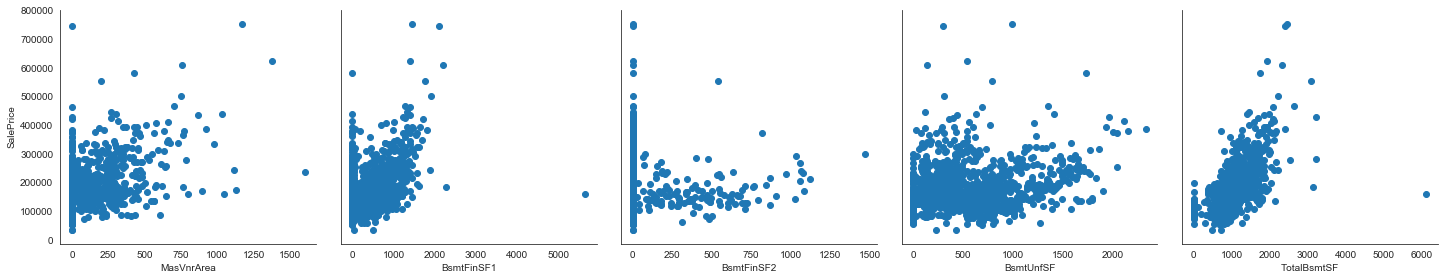

In [283]:
# Check outliers of numerical value in response to SalePrice
# Drop the outliers for TotalBsmtSF
g = sns.PairGrid(df, y_vars=["SalePrice"], x_vars=["MasVnrArea", "BsmtFinSF1", "BsmtFinSF2", "BsmtUnfSF", "TotalBsmtSF"], height=4)
g.map(plt.scatter)

In [284]:
# TotalBsmtSF = BsmtUnfSF + BsmtFinSF1 + BsmtFinSF2
# Check how many 0 a variable has, 0 means the house does 
# drop BsmtUnfSF, BsmtFinSF1, BsmtFinSF2 to avoid muticolinearity

df['BsmtUnfSF'].value_counts()[0]/1168*100

8.561643835616438

In [285]:
df['BsmtFinSF1'].value_counts()[0]/1168*100

31.506849315068493

In [286]:
# Drop BsmtFinSF2, too many 0
df['BsmtFinSF2'].value_counts()[0]/1168*100

88.61301369863014

### Convert Ordinal Variable to Numerical Ranking

In [287]:
#ExterQual: Evaluates the quality of the material on the exterior
replace_ExterQual = {"Po" : 1, "Fa": 2, 'TA': 3, 'Gd': 4, 'Ex': 5}
df['ExterQual'] = df.ExterQual.replace(replace_ExterQual)

#ExterCond: Evaluates the present condition of the material on the exterior
replace_ExterCond = {"Po" : 1, "Fa": 2, 'TA': 3, 'Gd': 4, 'Ex': 5}
df['ExterCond'] = df.ExterCond.replace(replace_ExterCond)

#BsmtQual: Evaluates the height of the basement
replace_BsmtQual = {"Po": 1, "Fa": 2, 'TA': 3, 'Gd': 4, 'Ex': 5}
df['BsmtQual'] = df.BsmtQual.replace(replace_BsmtQual)

#BsmtCond: Evaluates the general condition of the basement
replace_BsmtCond = {"Po": 1, "Fa": 2, 'TA': 3, 'Gd': 4, 'Ex': 5}
df['BsmtCond'] = df.BsmtCond.replace(replace_BsmtCond)
df['BsmtCond'] = df['BsmtCond'].astype(str).astype(int)

#BsmtExposure: Refers to walkout or garden level walls
replace_BsmtExposure = {"No": 1, "Mn": 2, 'Av': 3, 'Gd': 4}
df['BsmtExposure'] = df.BsmtExposure.replace(replace_BsmtExposure)

#BsmtFinType1: Rating of basement finished area
replace_BsmtFinType1 = {"Unf": 1, "LwQ": 2, 'Rec': 3, 'BLQ': 4, 'ALQ': 5, "GLQ": 6}
df['BsmtFinType1'] = df.BsmtFinType1.replace(replace_BsmtFinType1)

#BsmtFinType2: Rating of basement finished area (if multiple types)
replace_BsmtFinType2 = {"Unf": 1, "LwQ": 2, 'Rec': 3, 'BLQ': 4, 'ALQ': 5, "GLQ": 6}
df['BsmtFinType2'] = df.BsmtFinType2.replace(replace_BsmtFinType2)

In [288]:
df.dtypes

RoofStyle        object
RoofMatl         object
Exterior1st      object
Exterior2nd      object
MasVnrType       object
MasVnrArea      float64
ExterQual         int64
ExterCond         int64
Foundation       object
BsmtQual          int64
BsmtCond          int64
BsmtExposure      int64
BsmtFinType1      int64
BsmtFinSF1        int64
BsmtFinType2      int64
BsmtFinSF2        int64
BsmtUnfSF         int64
TotalBsmtSF       int64
SalePrice         int64
logPrice        float64
dtype: object

### Categorical Variables

    RoofStyle: Type of roof
    
    RoofMatl: Roof material 
    [most roofmatrl is CompShg, the impact is trivial]
    
    Exterior1st: Exterior covering on house
    Exterior2nd: Exterior covering on house (if more than one material)
    [these two viable share the same pattern, can combine these two]
    
    MasVnrType: Masonry veneer type
    [Too many 0, drop this column]
    
    Foundation: Type of foundation

In [289]:
categories = list(df.select_dtypes('object').columns)
categories

['RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'Foundation']

In [290]:
def plotCat(cat,sort = False):
    fig = plt.figure(figsize=(14, 5))
    gs = gridspec.GridSpec(1, 2)
    ax1 = plt.subplot(gs[0, 0])
    ax2 = plt.subplot(gs[0, 1])
    
    perct = cat.value_counts(sort=sort)/df.shape[0]
    perct.plot.bar(ax=ax1)
    ax2.tick_params(axis='x', labelrotation=90)
    sns.boxplot(cat, df['logPrice'], order=perct.index, ax=ax2)

RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
Foundation


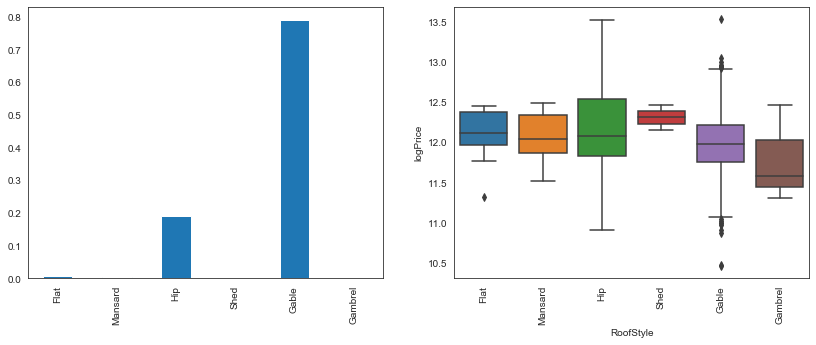

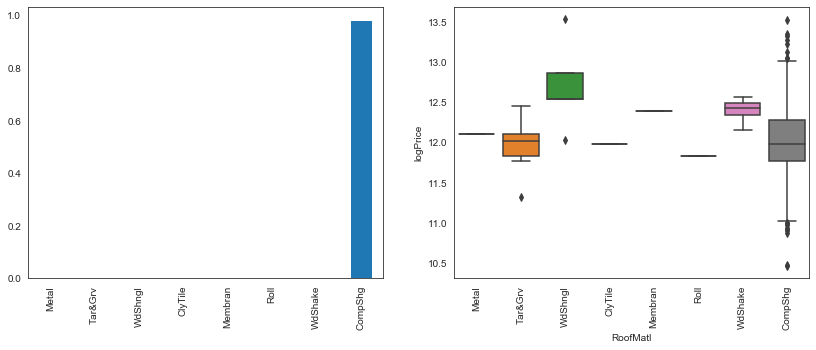

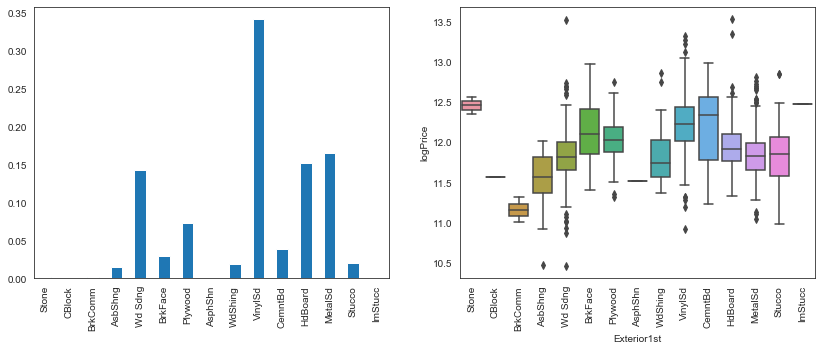

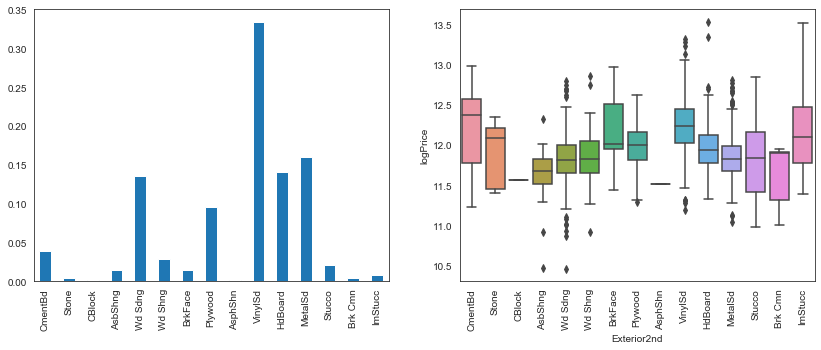

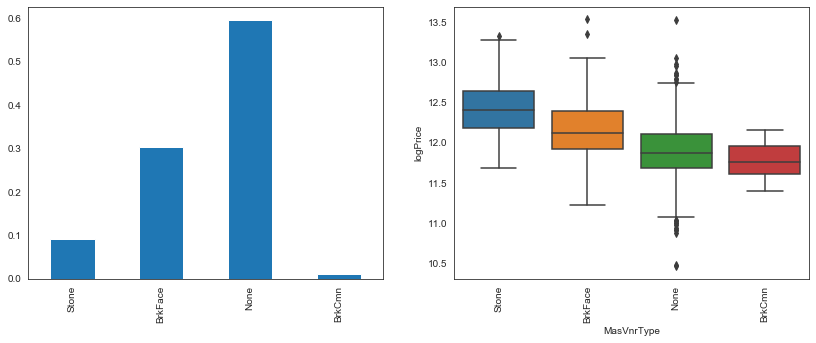

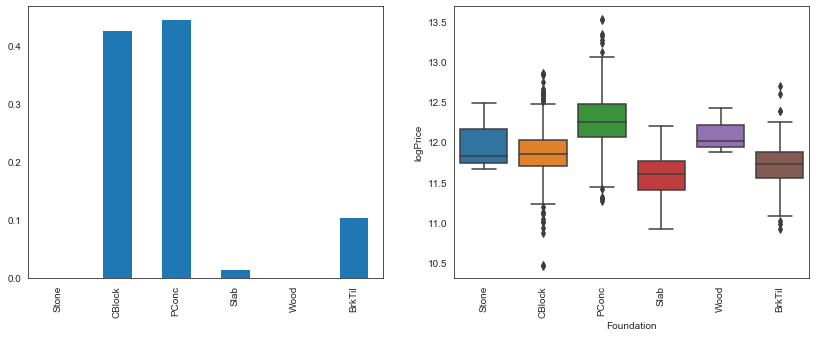

In [291]:
for cat in categories:
    print(cat)
    plotCat(df[cat])

### Categorical Transformation 

In [292]:
categories

['RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'Foundation']

In [293]:
df

,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,SalePrice,logPrice
Id,,,,,,,,,,,,,,,,,,,,
134,Gable,CompShg,VinylSd,VinylSd,BrkFace,136.0,4,3,PConc,5,3,1,6,1005,1,0,262,1267,220000,12.301383
291,Gable,CompShg,VinylSd,VinylSd,None,0.0,4,3,PConc,4,3,3,1,0,1,0,1079,1079,233230,12.359780
25,Gable,CompShg,Plywood,Plywood,None,0.0,3,4,CBlock,3,3,2,3,188,5,668,204,1060,154000,11.944708
1094,Hip,CompShg,MetalSd,MetalSd,BrkFace,166.0,3,3,CBlock,3,3,2,6,661,1,0,203,864,146000,11.891362
1289,Gable,CompShg,CemntBd,CmentBd,None,0.0,4,3,PConc,4,3,1,6,1158,1,0,343,1501,278000,12.535376
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
803,Gable,CompShg,WdShing,Wd Shng,None,0.0,4,3,PConc,4,3,3,6,648,1,0,80,728,189000,12.149502
54,Gable,WdShngl,WdShing,Wd Shng,None,0.0,4,3,CBlock,5,3,4,6,1810,1,0,32,1842,385000,12.860999
351,Hip,CompShg,MetalSd,MetalSd,BrkFace,362.0,5,3,PConc,5,3,1,1,0,1,0,1869,1869,318061,12.669998


In [247]:
cat_columns_idx = [df.columns.get_loc(col) for col in categories]

In [248]:
from sklearn.preprocessing import OneHotEncoder

drop_col = df[cat].value_counts().index[0] 
cat_columns_idx = [df.columns.get_loc(col) for col in categories]
ohe = OneHotEncoder(categorical_features=cat_columns_idx, sparse=False)
df_processed = ohe.fit_transform(df)
#ohe.transform( pd.DataFrame(df[[cat]].iloc[0,:] )) # for test 

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:451: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


ValueError: could not convert string to float: 'Gable'

### Ordinal Transformation 
 
    ExterQual: Evaluates the quality of the material on the exterior 
    
    ExterCond: Evaluates the present condition of the material on the exterior
    
    BsmtQual: Evaluates the height of the basement
    
    BsmtCond: Evaluates the general condition of the basement
    
    BsmtExposure: Refers to walkout or garden level walls
    
    BsmtFinType1: Rating of basement finished area
    
    BsmtFinType2: Rating of basement finished area (if multiple types)
    [drop 

In [294]:
ords = ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']

In [250]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_df = scaler.fit_transform(df[ords])
scaled_df = pd.DataFrame(scaled_df, columns=ords)

ExterQual


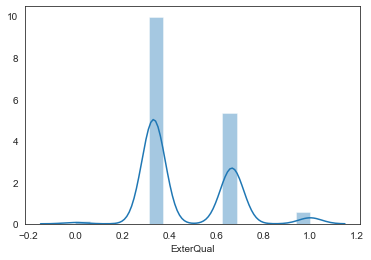

<Figure size 864x432 with 0 Axes>

ExterCond


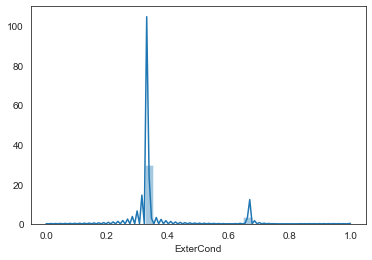

<Figure size 864x432 with 0 Axes>

BsmtQual


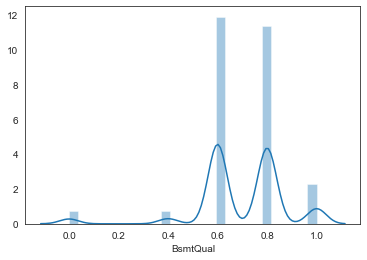

<Figure size 864x432 with 0 Axes>

BsmtCond


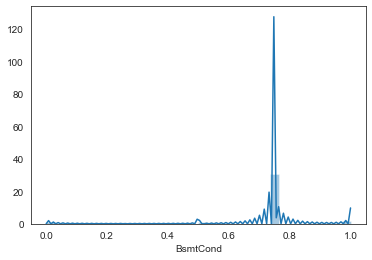

<Figure size 864x432 with 0 Axes>

BsmtExposure


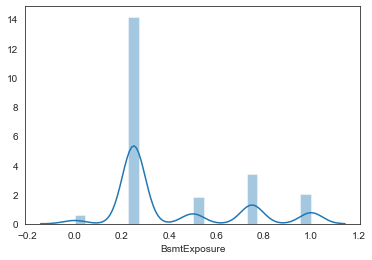

<Figure size 864x432 with 0 Axes>

BsmtFinType1


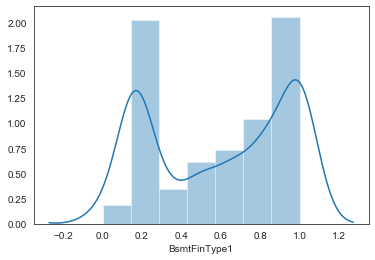

<Figure size 864x432 with 0 Axes>

BsmtFinType2


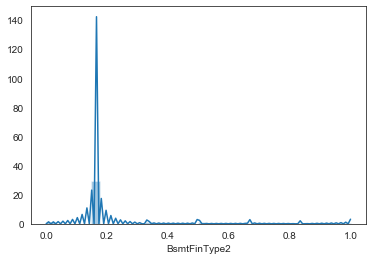

<Figure size 864x432 with 0 Axes>

In [251]:
### After scaling 
for i in ords:
    print(i)
    sns.distplot(scaled_df[i])
    plt.figure(figsize=(12, 6))
    plt.show()

In [252]:
df[ords] = scaled_df[ords]

### Numerical Transfermation 

In [295]:
# take log for left skewness: "MasVnrArea", "BsmtFinSF1", "BsmtFinSF2", "BsmtUnfSF", "TotalBsmtSF"
nums = ["MasVnrArea", "BsmtFinSF1", "BsmtFinSF2", "BsmtUnfSF", "TotalBsmtSF"]

In [296]:
from sklearn.preprocessing import StandardScaler
num_df = df[nums]
scaler = StandardScaler()
scaled_df = scaler.fit_transform(num_df)
scaled_df = pd.DataFrame(scaled_df, columns=nums)

In [297]:
df[nums] = scaled_df[nums]

In [303]:
for i in nums:
    df[i] = np.log(df[i])

MasVnrArea


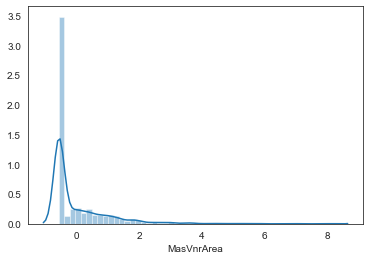

<Figure size 864x432 with 0 Axes>

BsmtFinSF1


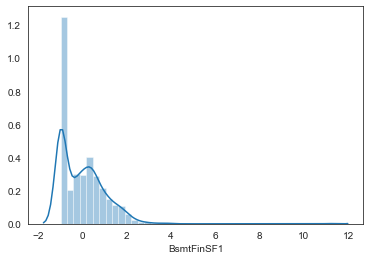

<Figure size 864x432 with 0 Axes>

BsmtFinSF2


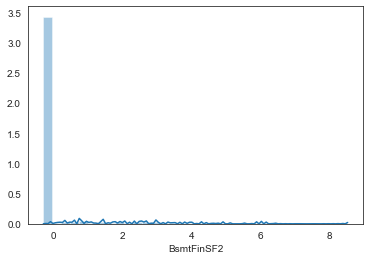

<Figure size 864x432 with 0 Axes>

BsmtUnfSF


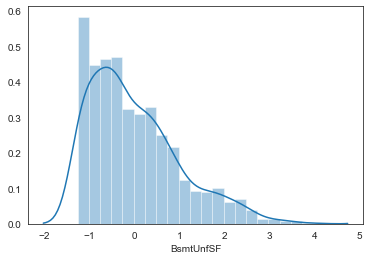

<Figure size 864x432 with 0 Axes>

TotalBsmtSF


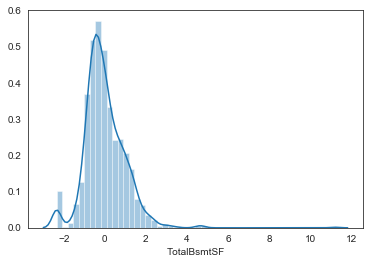

<Figure size 864x432 with 0 Axes>

In [306]:
### After scaling 
for i in nums:
    print(i)
    sns.distplot(scaled_df[i])
    plt.figure(figsize=(12, 6))
    plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a29306610>,
      dtype=object)

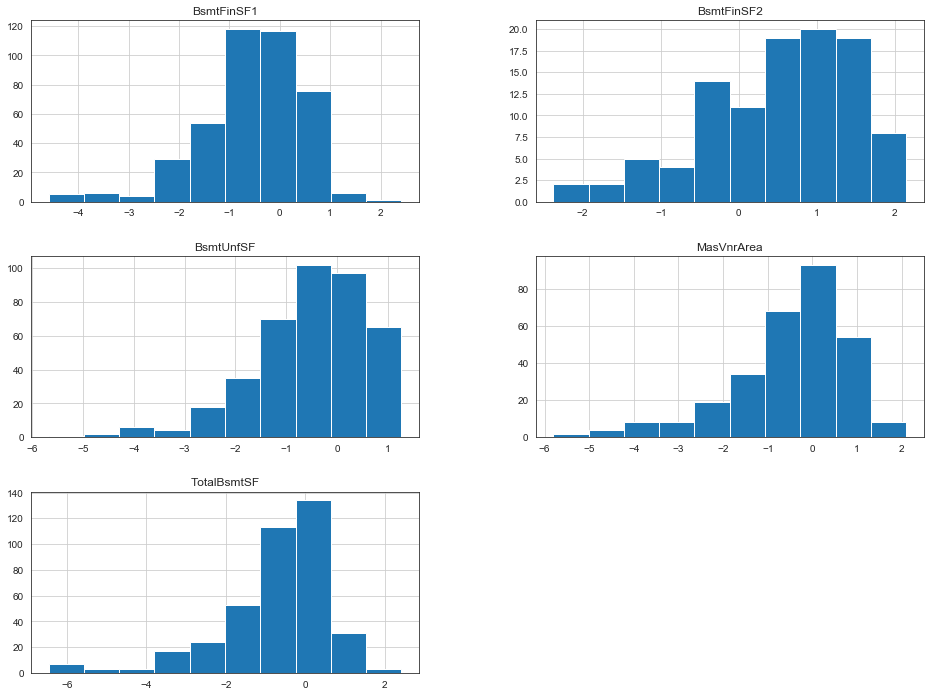

In [301]:
df[nums].hist(figsize=(16,12))

### Dummification of Categorical data

In [302]:
cat_columns = ['RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation']

In [ ]:
def dummification(df, cat_columns):
    data = df.copy()
    for column in cat_columns:
        dummied_df = pd.get_dummies(data[column], prefix=column, prefix_sep='__')
        dummied_df = dummied_df.drop(dummied_df.columns[0], axis=1)#drop 1st column
        data=pd.concat([data.drop(column,axis=1), dummied_df ], axis=1)
    return data

In [ ]:
transform = dummification(df, cat_columns)
transform.head()

In [ ]:
transform_names = transform.columns.to_list()
transform_names

### Filter by Pearson Method

In [ ]:
cor = transform.corr()
cor_target = abs(cor["SalePrice"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features

In [ ]:
cor = transform[['ExterQual', 'BsmtQual', 'TotalBsmtSF', 'Foundation__PConc']].corr()

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

### Wrap

In [ ]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

In [ ]:
X = transform.drop("SalePrice",1)   #Feature Matrix
y = transform["SalePrice"]          #Target Variable
transform.head()

In [ ]:
#Adding constant column of ones, mandatory for sm.OLS model
X_1 = sm.add_constant(X)
#Fitting sm.OLS model
model = sm.OLS(y,X_1).fit()
model.pvalues

In [ ]:
#Backward Elimination
cols = list(X.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X_1 = X[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print(selected_features_BE)

In [ ]:
model = LinearRegression()
#Initializing RFE model
rfe = RFE(model, 7)
#Transforming data using RFE
X_rfe = rfe.fit_transform(X,y)  
#Fitting the data to model
model.fit(X_rfe,y)
print(rfe.support_)
print(rfe.ranking_)

In [ ]:
#no of features
nof_list=np.arange(1,60)            
high_score=0
#Variable to store the optimum features
nof=0           
score_list =[]
for n in range(len(nof_list)):
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)
    model = LinearRegression()
    rfe = RFE(model,nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train,y_train)
    X_test_rfe = rfe.transform(X_test)
    model.fit(X_train_rfe,y_train)
    score = model.score(X_test_rfe,y_test)
    score_list.append(score)
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

In [ ]:
cols = list(X.columns)
model = LinearRegression()
#Initializing RFE model
rfe = RFE(model, 10)             
#Transforming data using RFE
X_rfe = rfe.fit_transform(X,y)  
#Fitting the data to model
model.fit(X_rfe,y)              
temp = pd.Series(rfe.support_,index = cols)
selected_features_rfe = temp[temp==True].index
print(selected_features_rfe)

### Lasso

In [ ]:
reg = LassoCV()
reg.fit(X, y)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X,y))
coef = pd.Series(reg.coef_, index = X.columns)

In [ ]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

In [ ]:
imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")